In [ ]:
import pandas as pd
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
! ls "/content/drive/MyDrive/UTA_Glucose/Ravikiran/data"

baseline  feature_engineered


In [ ]:
! ls "/content/drive/MyDrive/UTA_Glucose/Ravikiran/data/baseline"

MMCS0002_combined_imputed_baseline_data.csv


In [ ]:
! ls "/content/drive/MyDrive/UTA_Glucose/Fitabase Data/Minute-level Fitabase"

MMCS0002_dailyActivity_20190823_20210623.csv
MMCS0002_heartrate_1min_20190823_20210623.csv
MMCS0002_heartrate_1min_20190823_20210623.gsheet
MMCS0002_minuteIntensitiesNarrow_20190823_20210623.csv
MMCS0002_minuteIntensitiesNarrow_20190823_20210623.gsheet
MMCS0002_minuteSleep_20190823_20210623.csv
MMCS0002_minuteSleep_20190823_20210623.gsheet
MMCS0002_minuteStepsNarrow_20190823_20210623.csv
MMCS0002_minuteStepsNarrow_20190823_20210623.gsheet
MMCS0002_sleepDay_20190823_20210623.csv
MMCS0002_sleepStagesDay_20190823_20210623.csv
MMCS0003_dailyActivity_20190823_20210623.csv
MMCS0003_heartrate_1min_20190823_20210623.csv
MMCS0003_minuteIntensitiesNarrow_20190823_20210623.csv
MMCS0003_minuteSleep_20190823_20210623.csv
MMCS0003_minuteStepsNarrow_20190823_20210623.csv
MMCS0003_sleepDay_20190823_20210623.csv
MMCS0003_sleepStagesDay_20190823_20210623.csv
MMCS0005_dailyActivity_20190823_20210623.csv
MMCS0005_heartrate_1min_20190823_20210623.csv
MMCS0005_minuteIntensitiesNarrow_20190823_20210623.csv
M

In [ ]:
path =  "/content/drive/MyDrive/UTA_Glucose/Fitabase Data/Minute-level Fitabase"
id = "MMCS0002"

missing intervals 258


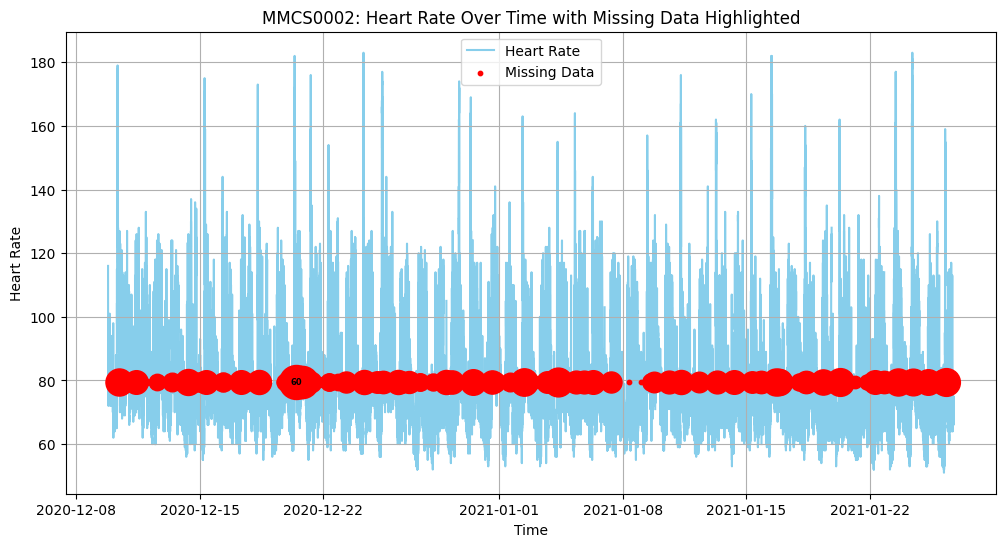

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data into a DataFrame
# Ensure the 'Time' column is parsed as datetime
df = pd.read_csv(f'{path}/{id}_heartrate_1min_20190823_20210623.csv', parse_dates=['Time'])

# Set the 'Time' column as the DataFrame index
df.set_index('Time', inplace=True)

# Generate a complete time index with one-minute frequency
full_time_index = pd.date_range(start=df.index.min(), end=df.index.max(), freq='T')

# Reindex the DataFrame to include all expected timestamps
df_reindexed = df.reindex(full_time_index)

# Identify missing intervals
missing_intervals = []
start = None

for time, value in df_reindexed['Value'].items():
    if pd.isna(value) and start is None:
        start = time
    elif not pd.isna(value) and start is not None:
        end = time
        missing_intervals.append((start, end))
        start = None

# Handle case where the last interval ends at the end of the data
if start is not None:
    missing_intervals.append((start, df_reindexed.index[-1]))


print(f"missing intervals {len(missing_intervals)}")

# Plot the data
plt.figure(figsize=(12, 6))

# Plot heart rate data with gaps (matplotlib skips over NaN automatically)
plt.plot(df_reindexed.index, df_reindexed['Value'], label='Heart Rate', color='skyblue', linewidth=1.5, zorder=1)

# Highlight missing data intervals
for start, end in missing_intervals:
    duration = (end - start).total_seconds() / 60  # Duration in minutes
    midpoint = start + (end - start) / 2

    # Calculate the size of the circle
    circle_size = duration * 10

    plt.scatter(midpoint, df_reindexed['Value'].mean(), color='red', s=circle_size, label='Missing Data' if start == missing_intervals[0][0] else "", zorder=2)

    # Add text in the center of the circle for durations above 45 minutes
    if duration > 59:
        plt.text(midpoint, df_reindexed['Value'].mean(), f"{int(duration)}",
                 color='black', fontsize=6, fontweight='bold',  ha='center', va='center')

# Customize the plot
plt.title(f'{id}: Heart Rate Over Time with Missing Data Highlighted')
plt.xlabel('Time')
plt.ylabel('Heart Rate')
plt.legend()
plt.grid(True)
plt.show()


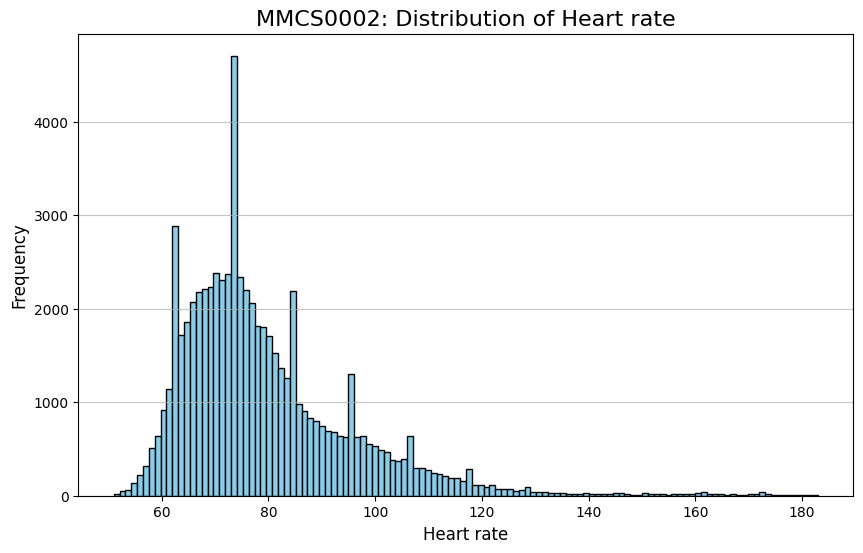

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data into a DataFrame
# Ensure the 'Time' column is parsed as datetime
df = pd.read_csv(f'{path}/{id}_heartrate_1min_20190823_20210623.csv', parse_dates=['Time'])


# Example: Plot a histogram for the column 'Historic Glucose mg/dL'
plt.figure(figsize=(10, 6))
plt.hist(df['Value'].dropna(), bins=120, color='skyblue', edgecolor='black')

# Customize the plot
plt.title(f'{id}: Distribution of Heart rate', fontsize=16)
plt.xlabel('Heart rate', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.75)  # Optional: Add gridlines
plt.show()


In [ ]:
len(missing_intervals)

258

missing intervals 0


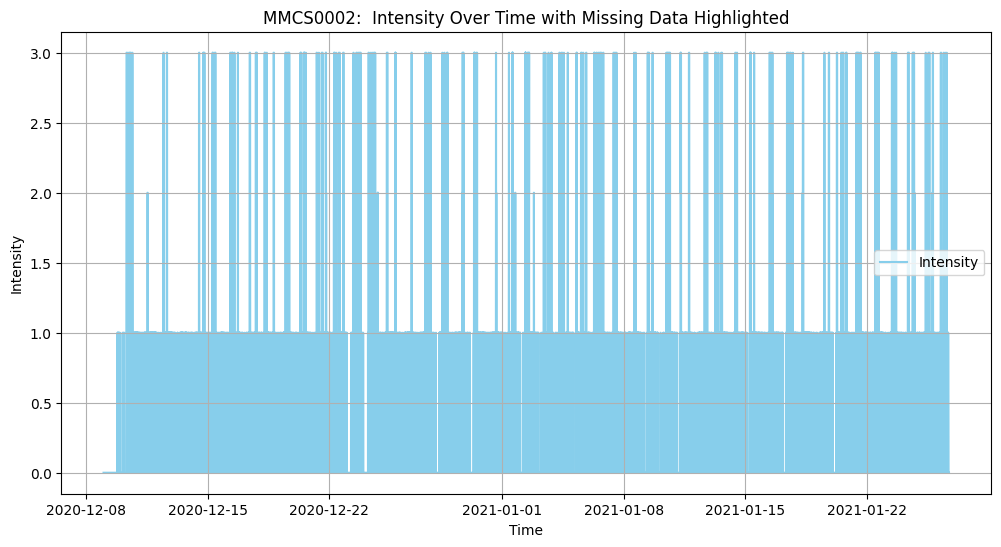

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data into a DataFrame
# Ensure the 'Time' column is parsed as datetime
df = pd.read_csv(f'{path}/{id}_minuteIntensitiesNarrow_20190823_20210623.csv', parse_dates=['ActivityMinute'])

# Set the 'Time' column as the DataFrame index
df.set_index('ActivityMinute', inplace=True)

# Generate a complete time index with one-minute frequency
full_time_index = pd.date_range(start=df.index.min(), end=df.index.max(), freq='T')

# Reindex the DataFrame to include all expected timestamps
df_reindexed = df.reindex(full_time_index)

# Identify missing intervals
missing_intervals = []
start = None

for time, value in df_reindexed['Intensity'].items():
    if pd.isna(value) and start is None:
        start = time
    elif not pd.isna(value) and start is not None:
        end = time
        missing_intervals.append((start, end))
        start = None

# Handle case where the last interval ends at the end of the data
if start is not None:
    missing_intervals.append((start, df_reindexed.index[-1]))

# Plot the data
plt.figure(figsize=(12, 6))

# Plot heart rate data with gaps (matplotlib skips over NaN automatically)
plt.plot(df_reindexed.index, df_reindexed['Intensity'], label='Intensity', color='skyblue', linewidth=1.5, zorder=1)

print(f"missing intervals {len(missing_intervals)}")

# Highlight missing data intervals
for start, end in missing_intervals:
    duration = (end - start).total_seconds() / 60  # Duration in minutes
    midpoint = start + (end - start) / 2

    # Calculate the size of the circle
    circle_size = duration * 10

    # Plot the red circle for the missing data
    plt.scatter(midpoint, df_reindexed['Intensity'].mean(), color='red', s=circle_size, label='Missing Data' if start == missing_intervals[0][0] else "", zorder=2)

    # Add text in the center of the circle for durations above 45 minutes
    if duration > 59:
        plt.text(midpoint, df_reindexed['Intensity'].mean(), f"{int(duration)}",
                 color='black', fontsize=8, fontweight='bold',  ha='center', va='center')

# Customize the plot
plt.title(f'{id}:  Intensity Over Time with Missing Data Highlighted')
plt.xlabel('Time')
plt.ylabel('Intensity')
plt.legend()
plt.grid(True)
plt.show()


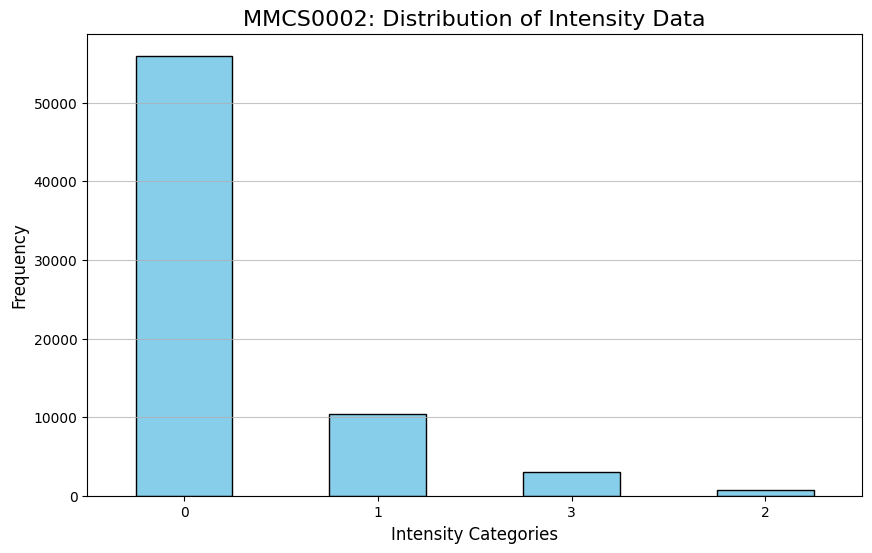

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data into a DataFrame
# Ensure the 'ActivityMinute' column is parsed as datetime
df = pd.read_csv(f'{path}/{id}_minuteIntensitiesNarrow_20190823_20210623.csv', parse_dates=['ActivityMinute'])

# Count the frequency of each category in the 'Intensity' column
intensity_counts = df['Intensity'].value_counts()

# Plot a bar chart
plt.figure(figsize=(10, 6))
intensity_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Customize the plot
plt.title(f'{id}: Distribution of Intensity Data', fontsize=16)
plt.xlabel('Intensity Categories', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.grid(axis='y', alpha=0.75)  # Optional: Add gridlines
plt.show()


missing intervals 24


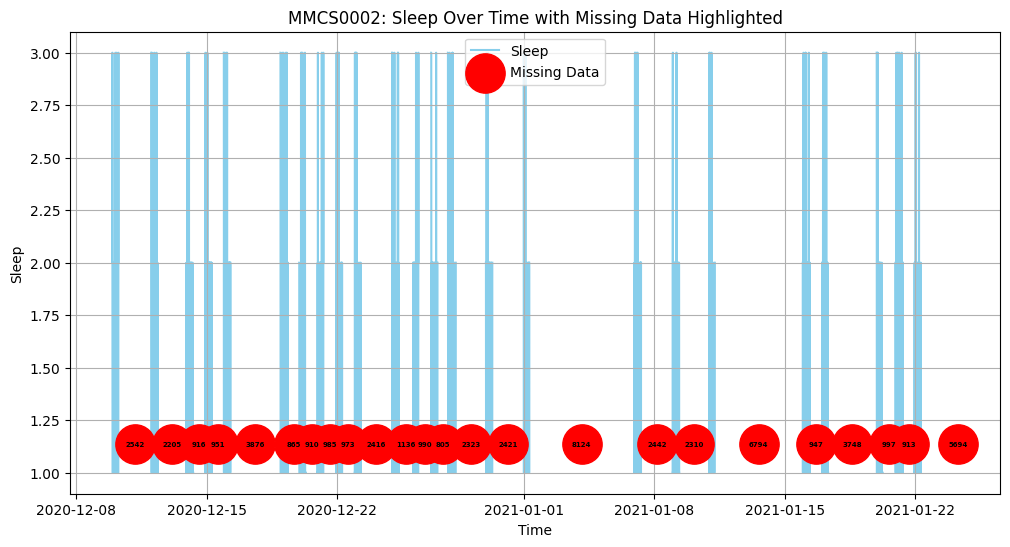

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data into a DataFrame
# Ensure the 'Time' column is parsed as datetime
df = pd.read_csv(f'{path}/{id}_minuteSleep_20190823_20210623.csv', parse_dates=['date'])

# Set the 'Time' column as the DataFrame index
df.set_index('date', inplace=True)

# Generate a complete time index with one-minute frequency
full_time_index = pd.date_range(start=df.index.min(), end=df.index.max(), freq='T')

# Reindex the DataFrame to include all expected timestamps
df_reindexed = df.reindex(full_time_index)

# Identify missing intervals
missing_intervals = []
start = None

for time, value in df_reindexed['value'].items():
    if pd.isna(value) and start is None:
        start = time
    elif not pd.isna(value) and start is not None:
        end = time
        missing_intervals.append((start, end))
        start = None

# Handle case where the last interval ends at the end of the data
if start is not None:
    missing_intervals.append((start, df_reindexed.index[-1]))

print(f"missing intervals {len(missing_intervals)}")

# Plot the data
plt.figure(figsize=(12, 6))

# Plot heart rate data with gaps (matplotlib skips over NaN automatically)
plt.plot(df_reindexed.index, df_reindexed['value'], label='Sleep', color='skyblue', linewidth=1.5, zorder=1)

# Highlight missing data intervals
for start, end in missing_intervals:
    duration = (end - start).total_seconds() / 60  # Duration in minutes
    midpoint = start + (end - start) / 2

    # Calculate the size of the circle
    circle_size = 800

    # Plot the red circle for the missing data
    plt.scatter(midpoint, df_reindexed['value'].mean(), color='red', s=circle_size, label='Missing Data' if start == missing_intervals[0][0] else "", zorder=2)

    # Add text in the center of the circle for durations above 45 minutes
    if duration > 59:
        plt.text(midpoint, df_reindexed['value'].mean(), f"{int(duration)}",
                 color='black', fontsize=5, fontweight='bold',  ha='center', va='center')

# Customize the plot
plt.title(f'{id}: Sleep Over Time with Missing Data Highlighted')
plt.xlabel('Time')
plt.ylabel('Sleep')
plt.legend()
plt.grid(True)
plt.show()


value
1    20907
2     1994
3      507
Name: count, dtype: int64


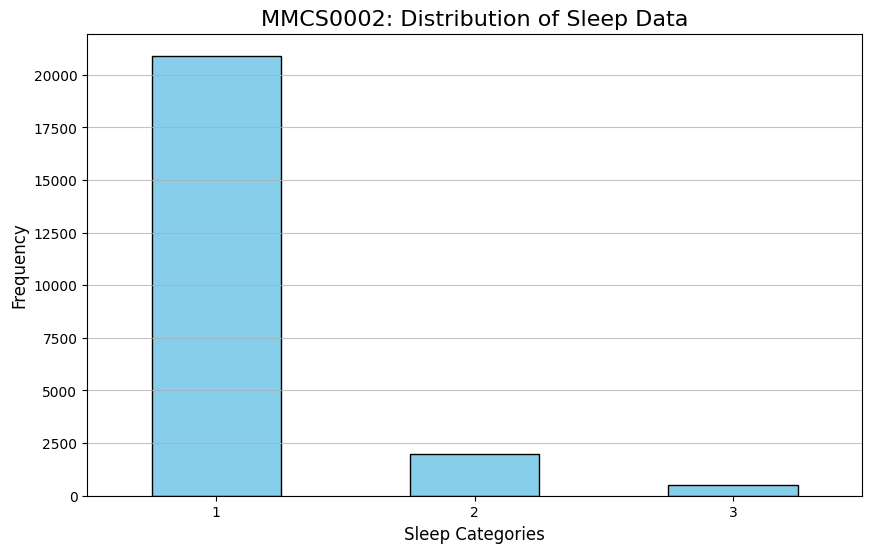

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data into a DataFrame
# Ensure the 'date' column is parsed as datetime
df = pd.read_csv(f'{path}/{id}_minuteSleep_20190823_20210623.csv', parse_dates=['date'])

# Count the frequency of each category in the 'value' column
value_counts = df['value'].value_counts()

print(value_counts)

# Plot a bar chart
plt.figure(figsize=(10, 6))
value_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Customize the plot
plt.title(f'{id}: Distribution of Sleep Data', fontsize=16)
plt.xlabel('Sleep Categories', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.grid(axis='y', alpha=0.75)  # Optional: Add gridlines
plt.show()


missing intervals 0


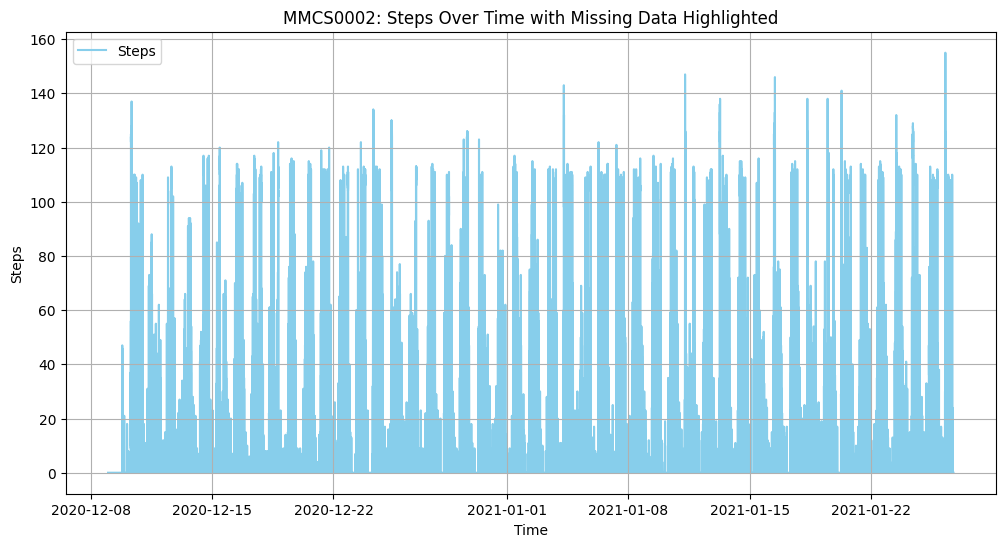

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data into a DataFrame
# Ensure the 'Time' column is parsed as datetime
df = pd.read_csv(f'{path}/{id}_minuteStepsNarrow_20190823_20210623.csv', parse_dates=['ActivityMinute'])

# Set the 'Time' column as the DataFrame index
df.set_index('ActivityMinute', inplace=True)

# Generate a complete time index with one-minute frequency
full_time_index = pd.date_range(start=df.index.min(), end=df.index.max(), freq='T')

# Reindex the DataFrame to include all expected timestamps
df_reindexed = df.reindex(full_time_index)

# Identify missing intervals
missing_intervals = []
start = None

for time, value in df_reindexed['Steps'].items():
    if pd.isna(value) and start is None:
        start = time
    elif not pd.isna(value) and start is not None:
        end = time
        missing_intervals.append((start, end))
        start = None

# Handle case where the last interval ends at the end of the data
if start is not None:
    missing_intervals.append((start, df_reindexed.index[-1]))

print(f"missing intervals {len(missing_intervals)}")
# Plot the data
plt.figure(figsize=(12, 6))

# Plot heart rate data with gaps (matplotlib skips over NaN automatically)
plt.plot(df_reindexed.index, df_reindexed['Steps'], label='Steps', color='skyblue', linewidth=1.5, zorder=1)

# Highlight missing data intervals
for start, end in missing_intervals:
    duration = (end - start).total_seconds() / 60  # Duration in minutes
    midpoint = start + (end - start) / 2

    # Calculate the size of the circle
    circle_size = duration * 10

    # Plot the red circle for the missing data
    plt.scatter(midpoint, df_reindexed['Steps'].mean(), color='red', s=circle_size, label='Missing Data' if start == missing_intervals[0][0] else "", zorder=2)

    # Add text in the center of the circle for durations above 45 minutes
    if duration > 59:
        plt.text(midpoint, df_reindexed['Steps'].mean(), f"{int(duration)}",
                 color='black', fontsize=8, fontweight='bold',  ha='center', va='center')

# Customize the plot
plt.title(f'{id}: Steps Over Time with Missing Data Highlighted')
plt.xlabel('Time')
plt.ylabel('Steps')
plt.legend()
plt.grid(True)
plt.show()


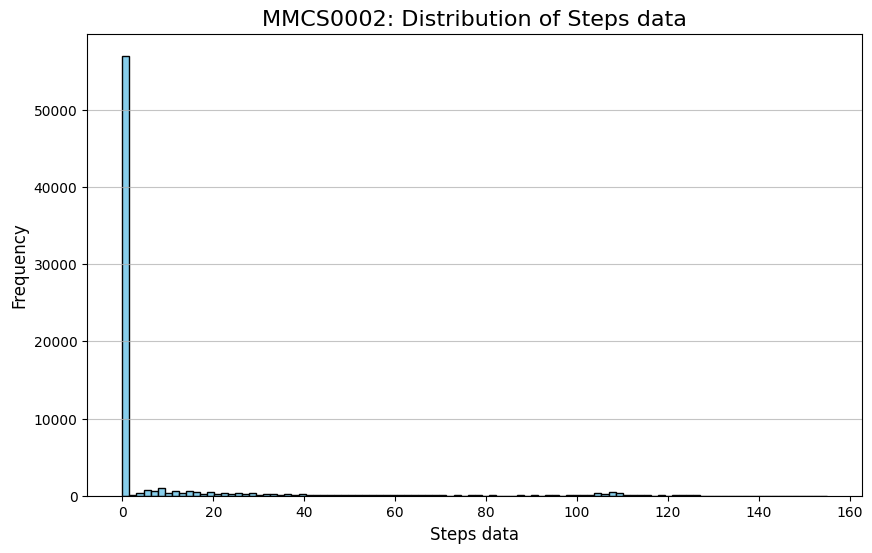

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data into a DataFrame
# Ensure the 'Time' column is parsed as datetime
df = pd.read_csv(f'{path}/{id}_minuteStepsNarrow_20190823_20210623.csv', parse_dates=['ActivityMinute'])


# Example: Plot a histogram for the column 'Historic Glucose mg/dL'
plt.figure(figsize=(10, 6))
plt.hist(df['Steps'].dropna(), bins=100, color='skyblue', edgecolor='black')

# Customize the plot
plt.title(f'{id}: Distribution of Steps data', fontsize=16)
plt.xlabel('Steps data', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.75)  # Optional: Add gridlines
plt.show()

In [ ]:
glucose_path = "/content/drive/MyDrive/UTA_Glucose/CGM Data - Renamed/MMCS0002_glucose_7-6-2021.csv"

missing intervals 23


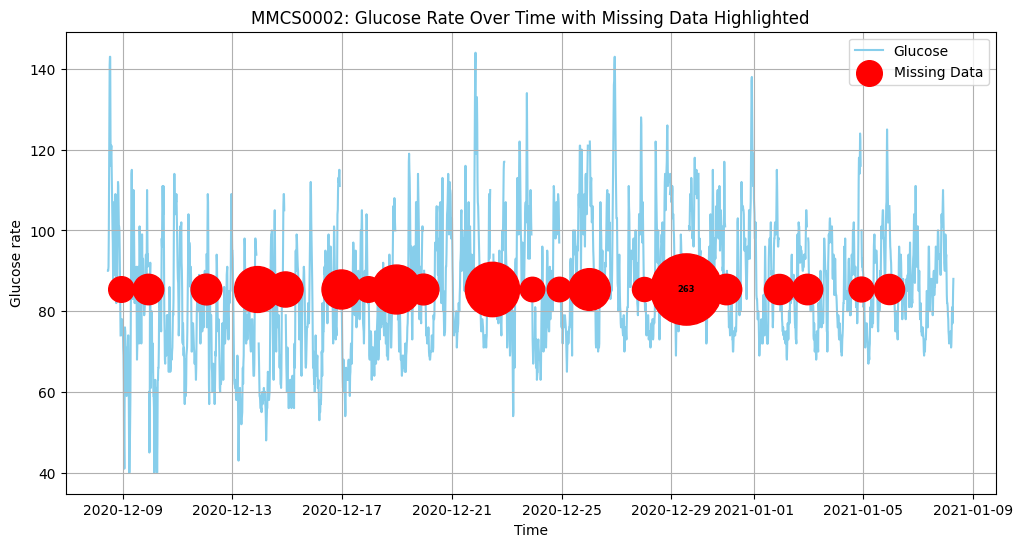

In [ ]:
df = pd.read_csv(glucose_path)
df = df[df["Record Type"] == 0]
df = df[["Device Timestamp", "Historic Glucose mg/dL"]]

# Convert the timestamp column to datetime
df['Device Timestamp'] = pd.to_datetime(df['Device Timestamp'])

# Calculate the difference between consecutive timestamps
df['Time_Diff'] = df['Device Timestamp'].diff()

# Identify missing intervals (where difference > 20 minutes)
missing_intervals = df[df['Time_Diff'] > pd.Timedelta(minutes=20)]

# Insert NaN for missing intervals
for idx, row in missing_intervals.iterrows():
    df.loc[idx, "Historic Glucose mg/dL"] = None

# Plot the data with gaps
plt.figure(figsize=(12, 6))
plt.plot(df['Device Timestamp'], df["Historic Glucose mg/dL"],
         label='Glucose', color='skyblue', linewidth=1.5, zorder=1)  # Blue line with lower zorder

print(f"missing intervals {len(missing_intervals)}")

# Highlight missing intervals
for idx, row in missing_intervals.iterrows():
    midpoint = row['Device Timestamp'] - (row['Time_Diff'] / 2)
    duration = row['Time_Diff'].total_seconds() / 60  # Duration in minutes
    circle_size = duration * 10

    # Red dots for missing intervals with higher zorder
    plt.scatter(midpoint, df["Historic Glucose mg/dL"].mean(),
                color='red', s=circle_size, label='Missing Data' if idx == missing_intervals.index[0] else "", zorder=2)

    # Add text for intervals longer than 45 minutes
    if duration > 200:
        plt.text(midpoint, df["Historic Glucose mg/dL"].mean(), f"{int(duration)}",
                 color='black', fontsize=6, ha='center', va='center', fontweight='bold', zorder=3)

# Customize the plot
plt.title(f'{id}: Glucose Rate Over Time with Missing Data Highlighted')
plt.xlabel('Time')
plt.ylabel('Glucose rate')
plt.legend()
plt.grid(True)
plt.show()

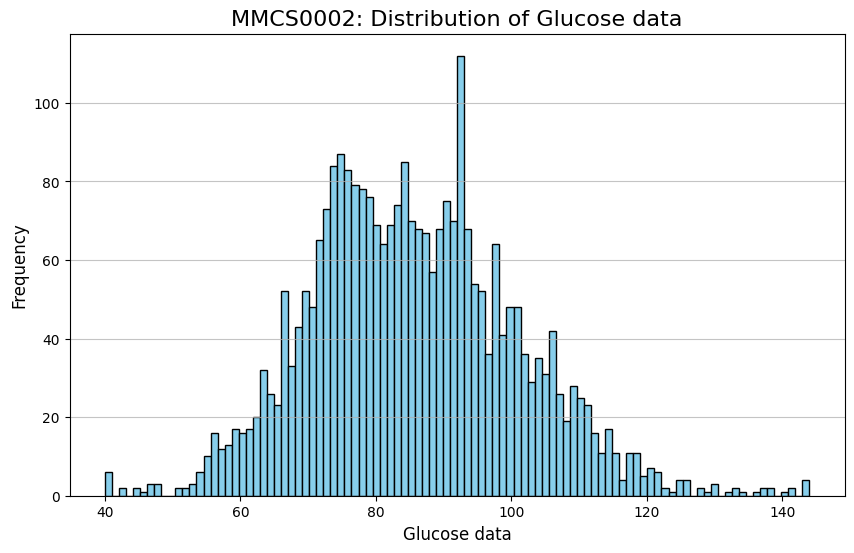

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data into a DataFrame
# Ensure the 'Time' column is parsed as datetime
df = pd.read_csv(glucose_path)
df = df[df["Record Type"] == 0]
df = df[["Device Timestamp", "Historic Glucose mg/dL"]]


# Example: Plot a histogram for the column 'Historic Glucose mg/dL'
plt.figure(figsize=(10, 6))
plt.hist(df['Historic Glucose mg/dL'].dropna(), bins=100, color='skyblue', edgecolor='black')

# Customize the plot
plt.title(f'{id}: Distribution of Glucose data', fontsize=16)
plt.xlabel('Glucose data', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.75)  # Optional: Add gridlines
plt.show()

In [ ]:
def create_maximum_time_index(file_paths, freq='T'):
    # Initialize min and max times
    min_time, max_time = None, None
    data_frames = []

    for file_path in file_paths:
        data = pd.read_csv(file_path)

        # Extract the datetime column
        datetime_col = next(col for col in data.columns if 'date' in col.lower() or 'time' in col.lower() or 'activityminute' in col.lower())

        # Convert to datetime and find the min and max times
        print(datetime_col)
        data[datetime_col] = pd.to_datetime(data[datetime_col])
        min_time = data[datetime_col].min() if min_time is None else min(min_time, data[datetime_col].min())
        max_time = data[datetime_col].max() if max_time is None else max(max_time, data[datetime_col].max())

        print(data.columns)
        data_frames.append((file_path, datetime_col, data))

    # Create a complete time index covering the entire time range, with 1-minute frequency
    maximum_time_index = pd.date_range(start=min_time, end=max_time, freq=freq)

    return maximum_time_index, data_frames

In [ ]:
def fill_missing_values(data, datetime_col, max_time_index, fill_type='zero', window=1440, min_periods=1):
    # Set datetime column as index
    data.set_index(datetime_col, inplace=True)

    # Reindex to include the maximum time index
    data = data.reindex(max_time_index)

    # Fill missing values
    if fill_type == 'zero':
        data.fillna(0, inplace=True)
    elif fill_type == 'rolling_mean':
        data.fillna(data.rolling(window=window, min_periods=min_periods).mean(), inplace=True)
        data.fillna(method='bfill', inplace=True)
        data.fillna(method='ffill', inplace=True)

    # Reset index
    data.reset_index(inplace=True)
    data.rename(columns={'index': datetime_col}, inplace=True)
    print(data.columns)
    print(data.shape)
    return data

In [ ]:
def add_intensity_features(df, date_col='ActivityMinute', intensity_col='Intensity'):
    """
    Adds rolling statistics, lag features, rate of change, difference features, switch features,
    and lag difference features with rolling mean and standard deviation for activity intensity data.

    Parameters:
    df (pd.DataFrame): Input DataFrame containing a date column and an intensity column representing activity intensity.
    date_col (str): Name of the column containing timestamps (default: 'ActivityMinute').
    intensity_col (str): Name of the column containing intensity values (default: 'Intensity').

    Returns:
    pd.DataFrame: DataFrame with added rolling statistics, lag features, rate of change, difference features,
                  switch features, and lag difference features with rolling mean and standard deviation.
    """
    # Ensure the date column is in datetime format for accurate time-based calculations
    df[date_col] = pd.to_datetime(df[date_col])

    # Set the date column as the index to facilitate rolling and lag operations
    df.set_index(date_col, inplace=True)

    # Define intervals for rolling, lag, and switch features (in minutes)
    intervals = [15, 30, 60, 90, 180, 240, 360, 720, 1440]

    # 1. Rolling Window Statistics
    for interval in intervals:
        window_label = f'Intensity_{interval}min'
        df[f'{window_label}_Mean'] = df[intensity_col].rolling(window=f'{interval}T').mean()
        df[f'{window_label}_Std'] = df[intensity_col].rolling(window=f'{interval}T').std()
        df[f'{window_label}_Min'] = df[intensity_col].rolling(window=f'{interval}T').min()
        df[f'{window_label}_Max'] = df[intensity_col].rolling(window=f'{interval}T').max()
        df[f'{window_label}_Median'] = df[intensity_col].rolling(window=f'{interval}T').median()
        df[f'{window_label}_Sum'] = df[intensity_col].rolling(window=f'{interval}T').sum()
        df[f'{window_label}_Skew'] = df[intensity_col].rolling(window=f'{interval}T').skew()
        df[f'{window_label}_Kurt'] = df[intensity_col].rolling(window=f'{interval}T').kurt()

    # 2. Lag Features
    lag_values = [1, 5, 15, 30, 60, 120, 180, 240, 360, 720, 1440]
    for lag in lag_values:
        df[f'Intensity_Lag_{lag}min'] = df[intensity_col].shift(lag)

    lag_columns = [f'Intensity_Lag_{lag}min' for lag in lag_values]
    df[lag_columns] = df[lag_columns].fillna(method='bfill')

    # 3. Rate of Change (RoC) Features
    for period in lag_values:
        df[f'Intensity_RoC_{period}min'] = df[intensity_col].diff(periods=period)

    # 4. Difference Features
    df['Intensity_Diff'] = df[intensity_col].diff()

    # 5. Lag Difference Features with Rolling Mean and Std
    for interval in intervals:
        # Lag difference
        df[f'Intensity_Lag_Diff_{interval}min'] = df[intensity_col] - df[intensity_col].shift(interval)
        # Rolling mean and standard deviation for lag difference
        df[f'Intensity_Lag_Diff_{interval}min_Mean'] = df[f'Intensity_Lag_Diff_{interval}min'].rolling(window=f'{interval}T').mean()
        df[f'Intensity_Lag_Diff_{interval}min_Std'] = df[f'Intensity_Lag_Diff_{interval}min'].rolling(window=f'{interval}T').std()

    # 6. Switch Features
    df['Intensity_Switch'] = df[intensity_col].diff().fillna(0)
    for interval in intervals:
        df[f'Intensity_Switch_Count_{interval}min'] = df['Intensity_Switch'].abs().rolling(window=f'{interval}T').sum()

    df['Switch_Direction'] = df['Intensity_Switch'].apply(lambda x: 1 if x > 0 else (-1 if x < 0 else 0))
    for interval in intervals:
        df[f'Intensity_Upward_Switch_Count_{interval}min'] = df['Switch_Direction'].apply(lambda x: 1 if x > 0 else 0).rolling(window=f'{interval}T').sum()
        df[f'Intensity_Downward_Switch_Count_{interval}min'] = df['Switch_Direction'].apply(lambda x: 1 if x < 0 else 0).rolling(window=f'{interval}T').sum()
        df[f'Intensity_Switch_Ratio_{interval}min'] = df[f'Intensity_Upward_Switch_Count_{interval}min'] / (df[f'Intensity_Downward_Switch_Count_{interval}min'] + 1e-5)

    df['Duration_Current_State'] = (df['Intensity_Switch'] != 0).cumsum().groupby(df['Intensity_Switch'].ne(0).cumsum()).cumcount() + 1

    # 7. Power Spectral Density (PSD)
    def calculate_psd(values):
        freqs, psd = signal.welch(values, fs=1)
        return np.sum(psd)

    for interval in intervals:
        df[f'Intensity_PSD_{interval}min'] = df[intensity_col].rolling(window=f'{interval}T').apply(calculate_psd, raw=False)

    # Fill NaN values generated by rolling, lag, and diff operations with 0 to avoid missing data
    df.fillna(0, inplace=True)

    # Reset the index to restore original DataFrame structure
    df.reset_index(inplace=True)

    return df



In [ ]:
def add_sleep_features(df, date_col='date', value_col='value'):
    """
    Adds rolling statistics, lag features, rate of change, difference features, cumulative features,
    switch features, and difference lag features with rolling mean and standard deviation for sleep degree data.

    Parameters:
    df (pd.DataFrame): Input DataFrame containing a date column and a value column representing sleep degree.
    date_col (str): Name of the column containing timestamps (default: 'date').
    value_col (str): Name of the column containing sleep degree values (default: 'value').

    Returns:
    pd.DataFrame: DataFrame with added rolling statistics, lag features, rate of change, difference features,
                  cumulative features, switch features, and difference lag features with rolling mean and standard deviation.
    """
    # Ensure the date column is in datetime format for accurate time-based calculations
    df[date_col] = pd.to_datetime(df[date_col])

    # Set the date column as the index to facilitate rolling and lag operations
    df.set_index(date_col, inplace=True)

    # Define intervals for rolling, lag, and switch features (in minutes)
    intervals = [15, 30, 60, 90, 180, 240, 360, 720, 1440]  # Common intervals in minutes

    # 1. Rolling Window Statistics
    for interval in intervals:
        window_label = f'Sleep_{interval}min'
        df[f'{window_label}_Mean'] = df[value_col].rolling(window=f'{interval}T').mean()
        df[f'{window_label}_Std'] = df[value_col].rolling(window=f'{interval}T').std()

    # 2. Lag Features
    lag_values = [1, 5, 15, 30, 60, 120, 180, 240, 360, 720, 1440]
    for lag in lag_values:
        df[f'Sleep_Lag_{lag}min'] = df[value_col].shift(lag)

    # Fill NaN values in lag features with the next valid value (forward fill)
    lag_columns = [f'Sleep_Lag_{lag}min' for lag in lag_values]
    df[lag_columns] = df[lag_columns].fillna(method='bfill')

    # 3. Rate of Change (RoC) Features
    for period in lag_values:
        df[f'Sleep_RoC_{period}min'] = df[value_col].diff(periods=period)

    # 4. Difference Features
    df['Sleep_Diff'] = df[value_col].diff()

    # 5. Difference Lag Features with Rolling Mean and Std
    for interval in intervals:
        # Calculate the difference lag
        df[f'Sleep_Lag_Diff_{interval}min'] = df[value_col] - df[value_col].shift(interval)
        # Add rolling mean and std for the difference lag
        df[f'Sleep_Lag_Diff_{interval}min_{interval}_Mean'] = df[f'Sleep_Lag_Diff_{interval}min'].rolling(window=f'{interval}T').mean()
        df[f'Sleep_Lag_Diff_{interval}min_{interval}_Std'] = df[f'Sleep_Lag_Diff_{interval}min'].rolling(window=f'{interval}T').std()

    # 6. Switch Features
    df['Sleep_Switch'] = df[value_col].diff().fillna(0)
    for interval in intervals:
        df[f'Sleep_Switch_Count_{interval}min'] = df['Sleep_Switch'].abs().rolling(window=f'{interval}T').sum()

    df['Switch_Direction'] = df['Sleep_Switch'].apply(lambda x: 1 if x > 0 else (-1 if x < 0 else 0))
    for interval in intervals:
        df[f'Sleep_Upward_Switch_Count_{interval}min'] = df['Switch_Direction'].apply(lambda x: 1 if x > 0 else 0).rolling(window=f'{interval}T').sum()
        df[f'Sleep_Downward_Switch_Count_{interval}min'] = df['Switch_Direction'].apply(lambda x: 1 if x < 0 else 0).rolling(window=f'{interval}T').sum()
        df[f'Sleep_Switch_Ratio_{interval}min'] = df[f'Sleep_Upward_Switch_Count_{interval}min'] / (df[f'Sleep_Downward_Switch_Count_{interval}min'] + 1e-5)

    df['Duration_Current_State'] = (df['Sleep_Switch'] != 0).cumsum().groupby(df['Sleep_Switch'].ne(0).cumsum()).cumcount() + 1

    # 7. Power Spectral Density (PSD)
    def calculate_psd(values):
        freqs, psd = signal.welch(values, fs=1)
        return np.sum(psd)

    for interval in intervals:
        df[f'Sleep_PSD_{interval}min'] = df[value_col].rolling(window=f'{interval}T').apply(calculate_psd, raw=False)

    # Fill NaN values generated by rolling, lag, and diff operations with 0 to avoid missing data
    df.fillna(0, inplace=True)

    # Reset the index to restore original DataFrame structure
    df.reset_index(inplace=True)

    return df



In [ ]:
def add_heart_rate_statistics(df, time_col='Time', value_col='Value'):
    """
    Adds rolling statistics, lag features, rate of change, difference features, and advanced features for heart rate data to the DataFrame.

    Parameters:
    df (pd.DataFrame): Input DataFrame containing time and heart rate value columns.
    time_col (str): Name of the column containing timestamps (default: 'Time').
    value_col (str): Name of the column containing heart rate values (default: 'Value').

    Returns:
    pd.DataFrame: DataFrame with added rolling statistics, lag features, rate of change, difference features, and advanced features.
    """

    print(f"heart rate columns -- {df.columns}")
    # Ensure the time column is in datetime format
    df[time_col] = pd.to_datetime(df[time_col])

    # Set the time column as the index to simplify rolling calculations
    df.set_index(time_col, inplace=True)

    # Define intervals for rolling and exponentially weighted statistics
    intervals = [15, 30, 60, 90, 180, 240, 360, 720, 1440]

    # 1. Rolling Window Statistics (Mean, Standard Deviation, Median, Percentiles)
    for interval in intervals:
        window_label = f'HeartRate_{interval}'
        # Calculate rolling mean and standard deviation for each interval
        df[f'{window_label}_Mean'] = df[value_col].rolling(window=f'{interval}T').mean()
        df[f'{window_label}_Std'] = df[value_col].rolling(window=f'{interval}T').std()

        # Calculate rolling median and percentiles (25th and 75th) for each interval
        df[f'{window_label}_Moving_Median'] = df[value_col].rolling(window=f'{interval}T').median()
        df[f'{window_label}_Perc_25'] = df[value_col].rolling(window=f'{interval}T').quantile(0.25)
        df[f'{window_label}_Perc_75'] = df[value_col].rolling(window=f'{interval}T').quantile(0.75)

    # 2. Expanding Window Statistics (Cumulative Mean and Standard Deviation)
    df['HeartRate_Expanding_Mean'] = df[value_col].expanding().mean()
    df['HeartRate_Expanding_Std'] = df[value_col].expanding().std()

    # 3. Exponentially Weighted Moving Average (EWMA) and Standard Deviation (EWMSD)
    for span in intervals:
        # Calculate exponentially weighted moving average for each span
        df[f'HeartRate_EWMA_{span}_Mean'] = df[value_col].ewm(span=span).mean()
        # Calculate exponentially weighted moving standard deviation for each span
        df[f'HeartRate_EWMA_{span}_Std'] = df[value_col].ewm(span=span).std()

    # 4. Lag Features (Shifting Values Backward for Different Time Lags)
    lag_values = [1, 5, 15, 30, 60, 120, 180, 240, 360, 720, 1440]
    for lag in lag_values:
        # Create lag features by shifting the values backward by the specified lag amount
        df[f'HeartRate_Lag_{lag}'] = df[value_col].shift(lag)

    # Fill NaN values in lag features with the next valid value (forward fill)
    lag_columns = [f'HeartRate_Lag_{lag}' for lag in lag_values]
    df[lag_columns] = df[lag_columns].fillna(method='bfill')

    # 5. Rate of Change (RoC) Features
    for period in lag_values:
        # Calculate the rate of change by differencing the values over the specified period
        df[f'HeartRate_RoC_{period}'] = df[value_col].diff(periods=period)

    # 6. Difference Features: Calculate the difference between consecutive heart rate values
    df['HeartRate_Diff'] = df[value_col].diff()

    # 7. Lag Features of HeartRate_Diff (Differences with Shifts)
    diff_lags = [15, 30, 60, 90, 180, 240, 360, 720, 1440]
    for lag in diff_lags:
        # Create lag features for the difference values with specified lags
        df[f'HeartRate_Diff_Lag_{lag}'] = df['HeartRate_Diff'].shift(lag)

    # 8. Rolling Mean and Standard Deviation of HeartRate_Diff_Lag Features
    for lag in diff_lags:
        # Calculate rolling mean and standard deviation for each lag feature
        df[f'HeartRate_Diff_Lag_{lag}_Mean_{lag}'] = df[f'HeartRate_Diff_Lag_{lag}'].rolling(window=f'{lag}T').mean()
        df[f'HeartRate_Diff_Lag_{lag}_Std_{lag}'] = df[f'HeartRate_Diff_Lag_{lag}'].rolling(window=f'{lag}T').std()

    # 9. Autocorrelation of Heart Rate with its Lagged Values for Each Interval
    autocorr_lag_5_intervals = [15, 30, 60, 120]
    autocorr_lag_30_intervals = [180, 240, 360, 720, 1440]

    # Autocorrelation with lag=5 for shorter intervals
    autocorr_lag = 5
    for interval in autocorr_lag_5_intervals:
        df[f'HeartRate_Autocorr_lag_5_{interval}'] = df[value_col].rolling(window=f'{interval}T').apply(lambda x: x.autocorr(lag=autocorr_lag), raw=False)

    # Autocorrelation with lag=30 for longer intervals
    autocorr_lag = 30
    for interval in autocorr_lag_30_intervals:
        df[f'HeartRate_Autocorr_lag_30_{interval}'] = df[value_col].rolling(window=f'{interval}T').apply(lambda x: x.autocorr(lag=autocorr_lag), raw=False)

    # 10. Power Spectral Density (PSD) to Analyze Frequency Components
    def calculate_psd(values):
        freqs, psd = signal.welch(values, fs=1)
        return np.sum(psd)

    for interval in intervals:
        # Apply the PSD calculation for each interval window
        df[f'HeartRate_PSD_{interval}'] = df[value_col].rolling(window=f'{interval}T').apply(calculate_psd, raw=False)

    '''
    # 11. Linear Trend over a Rolling Window for Each Interval
    for interval in intervals:
        # Fit a linear trend line over the rolling window and capture the slope
        df[f'HeartRate_Linear_Trend_{interval}'] = df[value_col].rolling(window=f'{interval}T').apply(lambda x: np.polyfit(range(len(x)), x, 1)[0], raw=False)
    '''

    df = df.bfill()

    # Reset the index to restore the original DataFrame structure
    df.reset_index(inplace=True)

    return df


In [ ]:
def add_steps_features(df, date_col='ActivityMinute', steps_col='Steps'):
    """
    Adds rolling statistics, lag features, rate of change, difference features, cumulative features,
    lag difference statistics, and daily aggregations for Fitbit steps data to the DataFrame.

    Parameters:
    df (pd.DataFrame): Input DataFrame containing a date column and a steps column representing the number of steps taken per minute.
    date_col (str): Name of the column containing timestamps (default: 'ActivityMinute').
    steps_col (str): Name of the column containing steps values (default: 'Steps').

    Returns:
    pd.DataFrame: DataFrame with added rolling statistics, lag features, rate of change, difference features,
    cumulative features, lag difference statistics, and daily aggregations.
    """
    # Ensure the date column is in datetime format for accurate time-based calculations
    df[date_col] = pd.to_datetime(df[date_col])

    # Set the date column as the index to facilitate rolling and lag operations
    df.set_index(date_col, inplace=True)

    # Define intervals for rolling, lag, and statistical features (in minutes)
    intervals = [15, 30, 60, 90, 180, 240, 360, 720, 1440]  # Common intervals in minutes

    # 1. Lag Features
    # Create lag features to capture the value of steps from previous time steps
    # For example, Steps_Lag_5min will be the number of steps taken 5 minutes before the current time
    lag_values = [1, 5, 15, 30, 60, 120, 180, 240, 360, 720, 1440]
    for lag in lag_values:
        # Shift the values backward by the specified lag amount (in minutes)
        df[f'Steps_Lag_{lag}min'] = df[steps_col].shift(lag)

    # Fill NaN values in lag features with the next valid value (forward fill)
    lag_columns = [f'Steps_Lag_{lag}min' for lag in lag_values]
    df[lag_columns] = df[lag_columns].fillna(method='bfill')

    # 2. Lag Differences
    # Compute differences between lagged values to capture changes over different time lags
    # For example, Steps_Lag_Diff_15min will be the difference between Steps_Lag_15min and Steps_Lag_1min
    for lag in lag_values:
        if lag > 1:
            # Calculate the difference between the current lag and the immediate past value (1-minute lag)
            df[f'Steps_Lag_Diff_{lag}min'] = df[f'Steps_Lag_{lag}min'] - df['Steps_Lag_1min']

    # 3. Rolling Statistics on Lag Differences
    # Calculate rolling statistics (mean, std, min, max) on lag differences for each interval
    # This helps capture patterns in the changes over different time intervals
    for lag in lag_values:
        if lag > 1:
            lag_diff_col = f'Steps_Lag_Diff_{lag}min'
            for interval in intervals:
                window_label = f'{lag_diff_col}_{interval}min'
                # Rolling mean of lag differences over the interval
                df[f'{window_label}_Mean'] = df[lag_diff_col].rolling(window=f'{interval}T').mean()
                # Rolling standard deviation of lag differences over the interval
                df[f'{window_label}_Std'] = df[lag_diff_col].rolling(window=f'{interval}T').std()
                # Rolling minimum of lag differences over the interval
                #df[f'{window_label}_Min'] = df[lag_diff_col].rolling(window=f'{interval}T').min()
                # Rolling maximum of lag differences over the interval
                #df[f'{window_label}_Max'] = df[lag_diff_col].rolling(window=f'{interval}T').max()

    # 4. Higher-Order Differences
    # Compute second-order differences to capture acceleration or deceleration in step changes
    # For example, this captures the change in the rate of step count change
    df['Steps_Diff'] = df[steps_col].diff()
    df['Steps_Diff_2nd_Order'] = df['Steps_Diff'].diff()

    # 5. Rolling Window Statistics on Original Step Data
    # Calculate various statistical measures over rolling windows for different intervals
    # This includes rolling mean, std, min, max, median, sum, skewness, and kurtosis
    for interval in intervals:
        window_label = f'Steps_{interval}min'
        # Rolling mean: Average steps over the interval
        df[f'{window_label}_Mean'] = df[steps_col].rolling(window=f'{interval}T').mean()
        # Rolling standard deviation: Variation of steps over the interval
        df[f'{window_label}_Std'] = df[steps_col].rolling(window=f'{interval}T').std()
        # Rolling minimum: Minimum steps in the interval
        #df[f'{window_label}_Min'] = df[steps_col].rolling(window=f'{interval}T').min()
        # Rolling maximum: Maximum steps in the interval
        #df[f'{window_label}_Max'] = df[steps_col].rolling(window=f'{interval}T').max()
        # Rolling median: Median steps in the interval
        #df[f'{window_label}_Median'] = df[steps_col].rolling(window=f'{interval}T').median()
        # Rolling sum: Total sum of steps in the interval
        #df[f'{window_label}_Sum'] = df[steps_col].rolling(window=f'{interval}T').sum()
        # Rolling skewness: Asymmetry of the steps distribution in the interval
        #df[f'{window_label}_Skew'] = df[steps_col].rolling(window=f'{interval}T').skew()
        # Rolling kurtosis: Peakedness or flatness of the steps distribution in the interval
        #df[f'{window_label}_Kurt'] = df[steps_col].rolling(window=f'{interval}T').kurt()

    # 6. Rate of Change (RoC) Features
    # Measure the change in steps over different periods to capture the rate of change
    # For example, Steps_RoC_15min will capture the change in steps over the past 15 minutes
    for period in lag_values:
        # Calculate the difference between the current value and the value 'period' minutes ago
        df[f'Steps_RoC_{period}min'] = df[steps_col].diff(periods=period)

    # Fill NaN values generated by rolling, lag, and diff operations with 0 to avoid missing data
    df.fillna(0, inplace=True)

    # Reset the index to restore the original DataFrame structure
    df.reset_index(inplace=True)

    return df

In [ ]:
def add_temporal_features(df, timestamp_col='Time', normalize=True, scaling_type='minmax'):
    """
    Adds temporal features to a DataFrame based on a timestamp column and normalizes them if specified.

    Parameters:
    df (pd.DataFrame): Input DataFrame containing a timestamp column.
    timestamp_col (str): Name of the column containing timestamps (default: 'Device Timestamp').
    normalize (bool): Whether to normalize the features (default: True).
    scaling_type (str): Type of scaling ('standard' for StandardScaler or 'minmax' for MinMaxScaler).

    Returns:
    pd.DataFrame: DataFrame with added and normalized temporal features.
    """

    # Ensure the timestamp column is in datetime format to perform datetime operations
    df[timestamp_col] = pd.to_datetime(df[timestamp_col])

    # Extract basic time-related features from the timestamp
    df['second'] = df[timestamp_col].dt.second
    df['minute'] = df[timestamp_col].dt.minute
    df['hour'] = df[timestamp_col].dt.hour
    df['day_of_week'] = df[timestamp_col].dt.dayofweek  # Monday=0, Sunday=6
    df['day_of_month'] = df[timestamp_col].dt.day

    # Cyclical encoding of time-based features
    df['SecondOfMinute_Sin'] = np.sin(2 * np.pi * df['second'] / 60)
    df['SecondOfMinute_Cos'] = np.cos(2 * np.pi * df['second'] / 60)
    df['MinuteOfHour_Sin'] = np.sin(2 * np.pi * df['minute'] / 60)
    df['MinuteOfHour_Cos'] = np.cos(2 * np.pi * df['minute'] / 60)
    df['HourOfDay_Sin'] = np.sin(2 * np.pi * df['hour'] / 24)
    df['HourOfDay_Cos'] = np.cos(2 * np.pi * df['hour'] / 24)
    df['DayOfWeek_Sin'] = np.sin(2 * np.pi * df['day_of_week'] / 7)
    df['DayOfWeek_Cos'] = np.cos(2 * np.pi * df['day_of_week'] / 7)

    # Calculate the minute of the day (total minutes since midnight)
    df['MinuteOfDay'] = df['hour'] * 60 + df['minute']
    df['MinuteOfDay_Sin'] = np.sin(2 * np.pi * df['MinuteOfDay'] / 1440)  # 1440 minutes in a day
    df['MinuteOfDay_Cos'] = np.cos(2 * np.pi * df['MinuteOfDay'] / 1440)

    # Weekend indicator
    df['Is_Weekend'] = df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

    # Parts of the day encoding
    def get_day_part(hour):
        if 5 <= hour < 12:
            return 'Morning'
        elif 12 <= hour < 17:
            return 'Afternoon'
        elif 17 <= hour < 21:
            return 'Evening'
        else:
            return 'Night'

    df['Day_Part'] = df['hour'].apply(get_day_part)
    df = pd.get_dummies(df, columns=['Day_Part'], drop_first=True)

    # Drop 'second' column as it might not be useful
    df.drop(['second'], axis=1, inplace=True)

    # Normalize features if specified
    if normalize:
        feature_columns = [
            'MinuteOfHour_Sin', 'MinuteOfHour_Cos',
            'HourOfDay_Sin', 'HourOfDay_Cos',
            'DayOfWeek_Sin', 'DayOfWeek_Cos',
            'MinuteOfDay_Sin', 'MinuteOfDay_Cos',
            'Is_Weekend'
        ] + [col for col in df.columns if col.startswith('Day_Part_')]

        # Choose scaler
        scaler = StandardScaler() if scaling_type == 'standard' else MinMaxScaler()
        df[feature_columns] = scaler.fit_transform(df[feature_columns])

    return df


In [ ]:
final_features = ['Time',
 'HeartRate',
 'HeartRate_15_Mean',
 'HeartRate_15_Std',
 'HeartRate_30_Mean',
 'HeartRate_30_Std',
 'HeartRate_60_Mean',
 'HeartRate_60_Std',
 'HeartRate_90_Mean',
 'HeartRate_90_Std',
 'HeartRate_180_Mean',
 'HeartRate_180_Std',
 'HeartRate_240_Mean',
 'HeartRate_240_Std',
 'HeartRate_360_Mean',
 'HeartRate_360_Std',
 'HeartRate_720_Mean',
 'HeartRate_720_Std',
 'HeartRate_1440_Mean',
 'HeartRate_1440_Std',
 'Sleep',
 'Sleep_15min_Mean',
 'Sleep_15min_Std',
 'Sleep_30min_Mean',
 'Sleep_30min_Std',
 'Sleep_60min_Mean',
 'Sleep_60min_Std',
 'Sleep_90min_Mean',
 'Sleep_90min_Std',
 'Sleep_180min_Mean',
 'Sleep_180min_Std',
 'Sleep_240min_Mean',
 'Sleep_240min_Std',
 'Sleep_360min_Mean',
 'Sleep_360min_Std',
 'Sleep_720min_Mean',
 'Sleep_720min_Std',
 'Sleep_1440min_Mean',
 'Sleep_1440min_Std',
 'Intensity',
 'Intensity_15min_Mean',
 'Intensity_15min_Std',
 'Intensity_30min_Mean',
 'Intensity_30min_Std',
 'Intensity_60min_Mean',
 'Intensity_60min_Std',
 'Intensity_90min_Mean',
 'Intensity_90min_Std',
 'Intensity_180min_Mean',
 'Intensity_180min_Std',
 'Intensity_240min_Mean',
 'Intensity_240min_Std',
 'Intensity_360min_Mean',
 'Intensity_360min_Std',
 'Intensity_720min_Mean',
 'Intensity_720min_Std',
 'Intensity_1440min_Mean',
 'Intensity_1440min_Std',
 'Steps',
 'Steps_15min_Mean',
 'Steps_15min_Std',
 'Steps_30min_Mean',
 'Steps_30min_Std',
 'Steps_60min_Mean',
 'Steps_60min_Std',
 'Steps_90min_Mean',
 'Steps_90min_Std',
 'Steps_180min_Mean',
 'Steps_180min_Std',
 'Steps_240min_Mean',
 'Steps_240min_Std',
 'Steps_360min_Mean',
 'Steps_360min_Std',
 'Steps_720min_Mean',
 'Steps_720min_Std',
 'Steps_1440min_Mean',
 'Steps_1440min_Std',
 'MinuteOfDay_Sin',
 'MinuteOfDay_Cos',
 'DayOfWeek_Sin',
 'DayOfWeek_Cos',
 'Is_Weekend']

In [ ]:
temporal_features = [
    'minute', 'hour', 'day_of_week', 'day_of_month',
    'SecondOfMinute_Sin', 'SecondOfMinute_Cos',
    'MinuteOfHour_Sin', 'MinuteOfHour_Cos',
    'HourOfDay_Sin', 'HourOfDay_Cos',
    'DayOfWeek_Sin', 'DayOfWeek_Cos',
    'MinuteOfDay', 'MinuteOfDay_Sin', 'MinuteOfDay_Cos',
    'Is_Weekend',
    'Day_Part_Afternoon', 'Day_Part_Evening', 'Day_Part_Night'
]


heartrate_features = [
    'Time','Value',
    'HeartRate_15_Mean', 'HeartRate_15_Std',
    'HeartRate_30_Mean', 'HeartRate_30_Std',
    'HeartRate_60_Mean', 'HeartRate_60_Std',
    'HeartRate_90_Mean', 'HeartRate_90_Std',
    'HeartRate_180_Mean', 'HeartRate_180_Std',
    'HeartRate_240_Mean', 'HeartRate_240_Std',
    'HeartRate_360_Mean', 'HeartRate_360_Std',
    'HeartRate_720_Mean', 'HeartRate_720_Std',
    'HeartRate_1440_Mean', 'HeartRate_1440_Std',

    'HeartRate_Lag_5', 'HeartRate_Lag_15', 'HeartRate_Lag_30', 'HeartRate_Lag_60', 'HeartRate_Lag_120',
    'HeartRate_Lag_180', 'HeartRate_Lag_240', 'HeartRate_Lag_360', 'HeartRate_Lag_720', 'HeartRate_Lag_1440',

    'HeartRate_RoC_5', 'HeartRate_RoC_15', 'HeartRate_RoC_30', 'HeartRate_RoC_60', 'HeartRate_RoC_120',
    'HeartRate_RoC_180', 'HeartRate_RoC_240', 'HeartRate_RoC_360', 'HeartRate_RoC_720', 'HeartRate_RoC_1440',

    'HeartRate_Diff_Lag_15', 'HeartRate_Diff_Lag_30', 'HeartRate_Diff_Lag_60', 'HeartRate_Diff_Lag_90',
    'HeartRate_Diff_Lag_180', 'HeartRate_Diff_Lag_240', 'HeartRate_Diff_Lag_360', 'HeartRate_Diff_Lag_720', 'HeartRate_Diff_Lag_1440',

    'HeartRate_Diff_Lag_15_Mean_15', 'HeartRate_Diff_Lag_15_Std_15', 'HeartRate_Diff_Lag_30_Mean_30', 'HeartRate_Diff_Lag_30_Std_30',
    'HeartRate_Diff_Lag_60_Mean_60', 'HeartRate_Diff_Lag_60_Std_60', 'HeartRate_Diff_Lag_90_Mean_90', 'HeartRate_Diff_Lag_90_Std_90',
    'HeartRate_Diff_Lag_180_Mean_180', 'HeartRate_Diff_Lag_180_Std_180', 'HeartRate_Diff_Lag_240_Mean_240', 'HeartRate_Diff_Lag_240_Std_240',
    'HeartRate_Diff_Lag_360_Mean_360', 'HeartRate_Diff_Lag_360_Std_360', 'HeartRate_Diff_Lag_720_Mean_720', 'HeartRate_Diff_Lag_720_Std_720',
    'HeartRate_Diff_Lag_1440_Mean_1440', 'HeartRate_Diff_Lag_1440_Std_1440'
]

sleep_features = [
    'date', 'value',
    # Rolling Window Statistics
    'Sleep_15min_Mean', 'Sleep_15min_Std',
    'Sleep_30min_Mean', 'Sleep_30min_Std',
    'Sleep_60min_Mean', 'Sleep_60min_Std',
    'Sleep_90min_Mean', 'Sleep_90min_Std',
    'Sleep_180min_Mean', 'Sleep_180min_Std',
    'Sleep_240min_Mean', 'Sleep_240min_Std',
    'Sleep_360min_Mean', 'Sleep_360min_Std',
    'Sleep_720min_Mean', 'Sleep_720min_Std',
    'Sleep_1440min_Mean', 'Sleep_1440min_Std',

    # Lag Features
    'Sleep_Lag_5min', 'Sleep_Lag_15min', 'Sleep_Lag_30min',
    'Sleep_Lag_60min', 'Sleep_Lag_120min', 'Sleep_Lag_180min', 'Sleep_Lag_240min',
    'Sleep_Lag_360min', 'Sleep_Lag_720min', 'Sleep_Lag_1440min',

    # Rate of Change (RoC) Features
    'Sleep_RoC_5min', 'Sleep_RoC_15min', 'Sleep_RoC_30min',
    'Sleep_RoC_60min', 'Sleep_RoC_120min', 'Sleep_RoC_180min', 'Sleep_RoC_240min',
    'Sleep_RoC_360min', 'Sleep_RoC_720min', 'Sleep_RoC_1440min',

    # Difference Lag Features with Rolling Mean and Std
    'Sleep_Lag_Diff_15min_15_Mean', 'Sleep_Lag_Diff_15min_15_Std',
    'Sleep_Lag_Diff_30min_30_Mean', 'Sleep_Lag_Diff_30min_30_Std',
    'Sleep_Lag_Diff_60min_60_Mean', 'Sleep_Lag_Diff_60min_60_Std',
    'Sleep_Lag_Diff_90min_90_Mean', 'Sleep_Lag_Diff_90min_90_Std',
    'Sleep_Lag_Diff_180min_180_Mean', 'Sleep_Lag_Diff_180min_180_Std',
    'Sleep_Lag_Diff_240min_240_Mean', 'Sleep_Lag_Diff_240min_240_Std',
    'Sleep_Lag_Diff_360min_360_Mean', 'Sleep_Lag_Diff_360min_360_Std',
    'Sleep_Lag_Diff_720min_720_Mean', 'Sleep_Lag_Diff_720min_720_Std',
    'Sleep_Lag_Diff_1440min_1440_Mean', 'Sleep_Lag_Diff_1440min_1440_Std',

]


intensity_features = [
    'ActivityMinute','Intensity',
    # Rolling Window Statistics
    'Intensity_15min_Mean', 'Intensity_15min_Std',
    'Intensity_30min_Mean', 'Intensity_30min_Std',
    'Intensity_60min_Mean', 'Intensity_60min_Std',
    'Intensity_90min_Mean', 'Intensity_90min_Std',
    'Intensity_180min_Mean', 'Intensity_180min_Std',
    'Intensity_240min_Mean', 'Intensity_240min_Std',
    'Intensity_360min_Mean', 'Intensity_360min_Std',
    'Intensity_720min_Mean', 'Intensity_720min_Std',
    'Intensity_1440min_Mean', 'Intensity_1440min_Std',

    # Lag Features
    'Intensity_Lag_5min', 'Intensity_Lag_15min', 'Intensity_Lag_30min', 'Intensity_Lag_60min', 'Intensity_Lag_120min', 'Intensity_Lag_180min', 'Intensity_Lag_240min', 'Intensity_Lag_360min', 'Intensity_Lag_720min', 'Intensity_Lag_1440min',

    # Rate of Change (RoC) Features
    'Intensity_RoC_5min', 'Intensity_RoC_15min', 'Intensity_RoC_30min',
    'Intensity_RoC_60min', 'Intensity_RoC_120min', 'Intensity_RoC_180min', 'Intensity_RoC_240min',
    'Intensity_RoC_360min', 'Intensity_RoC_720min', 'Intensity_RoC_1440min',

    # Lag Difference Features with Rolling Mean and Std
    'Intensity_Lag_Diff_15min_Mean', 'Intensity_Lag_Diff_15min_Std',
    'Intensity_Lag_Diff_30min_Mean', 'Intensity_Lag_Diff_30min_Std',
    'Intensity_Lag_Diff_60min_Mean', 'Intensity_Lag_Diff_60min_Std',
    'Intensity_Lag_Diff_90min_Mean', 'Intensity_Lag_Diff_90min_Std',
    'Intensity_Lag_Diff_180min_Mean', 'Intensity_Lag_Diff_180min_Std',
    'Intensity_Lag_Diff_240min_Mean', 'Intensity_Lag_Diff_240min_Std',
    'Intensity_Lag_Diff_360min_Mean', 'Intensity_Lag_Diff_360min_Std',
    'Intensity_Lag_Diff_720min_Mean', 'Intensity_Lag_Diff_720min_Std',
    'Intensity_Lag_Diff_1440min_Mean', 'Intensity_Lag_Diff_1440min_Std',
]

steps_features = [
     'ActivityMinute', 'Steps',
    # Lag Features
    'Steps_Lag_5min', 'Steps_Lag_15min', 'Steps_Lag_30min', 'Steps_Lag_60min',
    'Steps_Lag_120min', 'Steps_Lag_180min', 'Steps_Lag_240min', 'Steps_Lag_360min', 'Steps_Lag_720min', 'Steps_Lag_1440min',

    # Lag Differences
    'Steps_Lag_Diff_5min', 'Steps_Lag_Diff_15min', 'Steps_Lag_Diff_30min', 'Steps_Lag_Diff_60min',
    'Steps_Lag_Diff_120min', 'Steps_Lag_Diff_180min', 'Steps_Lag_Diff_240min', 'Steps_Lag_Diff_360min', 'Steps_Lag_Diff_720min', 'Steps_Lag_Diff_1440min',

    # Rolling Statistics on Lag Differences (Mean, Std)
    'Steps_Lag_Diff_15min_15min_Mean', 'Steps_Lag_Diff_15min_15min_Std',
    'Steps_Lag_Diff_30min_30min_Mean', 'Steps_Lag_Diff_30min_30min_Std',
    'Steps_Lag_Diff_60min_60min_Mean', 'Steps_Lag_Diff_60min_60min_Std',
    'Steps_Lag_Diff_180min_180min_Mean', 'Steps_Lag_Diff_180min_180min_Std',
    'Steps_Lag_Diff_240min_240min_Mean', 'Steps_Lag_Diff_240min_240min_Std',
    'Steps_Lag_Diff_360min_360min_Mean', 'Steps_Lag_Diff_360min_360min_Std',
    'Steps_Lag_Diff_720min_720min_Mean', 'Steps_Lag_Diff_720min_720min_Std',
    'Steps_Lag_Diff_1440min_1440min_Mean', 'Steps_Lag_Diff_1440min_1440min_Std',


    # Rolling Window Statistics on Original Step Data (Mean, Std)
    'Steps_15min_Mean', 'Steps_15min_Std', 'Steps_30min_Mean', 'Steps_30min_Std',
    'Steps_60min_Mean', 'Steps_60min_Std', 'Steps_90min_Mean', 'Steps_90min_Std',
    'Steps_180min_Mean', 'Steps_180min_Std', 'Steps_240min_Mean', 'Steps_240min_Std',
    'Steps_360min_Mean', 'Steps_360min_Std', 'Steps_720min_Mean', 'Steps_720min_Std',
    'Steps_1440min_Mean', 'Steps_1440min_Std',

    # Rate of Change (RoC) Features
    'Steps_RoC_5min', 'Steps_RoC_15min', 'Steps_RoC_30min',
    'Steps_RoC_60min', 'Steps_RoC_120min', 'Steps_RoC_180min', 'Steps_RoC_240min',
    'Steps_RoC_360min', 'Steps_RoC_720min', 'Steps_RoC_1440min'
]

In [ ]:
ids = ["MMCS0002", "MMCS0003", "MMCS0005", "MMCS0007", "MMCS0008", "MMCS0009", "MMCS0010", "MMCS0011", "MMCS0016"]

In [ ]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
from pathlib import Path

for id in ids:
    print(f"Processing id -- {id}")
    try:
        # Define file paths
        file_paths = {
            'steps': Path(path) / f"{id}_minuteStepsNarrow_20190823_20210623.csv",
            'heart_rate': Path(path) / f"{id}_heartrate_1min_20190823_20210623.csv",
            'intensity': Path(path) / f"{id}_minuteIntensitiesNarrow_20190823_20210623.csv",
            'sleep': Path(path) / f"{id}_minuteSleep_20190823_20210623.csv"
        }

        # Get list of file paths
        file_list = [str(file) for file in file_paths.values()]

        # Create maximum time index and process each file
        max_time_index, data_frames = create_maximum_time_index(file_list)

        processed_data_frames = []

        for file_p, datetime_col, data in data_frames:
            # Process each file based on its type
            if 'steps' in file_p.lower():
                df_steps = fill_missing_values(data, datetime_col, max_time_index, fill_type='zero')
                processed_data_frames.append(df_steps)
            elif 'heartrate' in file_p.lower():
                df_heart = fill_missing_values(data, datetime_col, max_time_index, fill_type='rolling_mean')
                df_heart.rename(columns={'Value': 'HeartRate'}, inplace=True)
                processed_data_frames.append(df_heart)
            elif 'intensities' in file_p.lower():
                df_intensities = fill_missing_values(data, datetime_col, max_time_index, fill_type='zero')
                processed_data_frames.append(df_intensities)
            elif 'sleep' in file_p.lower():
                data = data.drop(columns=['logId'], errors='ignore')
                df_sleep = fill_missing_values(data, datetime_col, max_time_index, fill_type='zero')
                df_sleep.rename(columns={'value': 'Sleep'}, inplace=True)
                processed_data_frames.append(df_sleep)

        # Concatenate horizontally
        combined_df = pd.concat(processed_data_frames, axis=1)
        print(combined_df.shape)
        print(combined_df.columns)
        combined_df[['Time', 'Steps', 'HeartRate', 'Intensity', 'Sleep']].to_csv(f'/content/drive/MyDrive/UTA_Glucose/Ravikiran/data/baseline/{id}_combined_imputed_baseline_data.csv', index=False)

    except Exception as e:
        print(f"Error processing id {id}: {e}")


Processing id -- MMCS0002
ActivityMinute
Index(['ActivityMinute', 'Steps'], dtype='object')
Time
Index(['Time', 'Value'], dtype='object')
ActivityMinute
Index(['ActivityMinute', 'Intensity'], dtype='object')
date
Index(['date', 'value', 'logId'], dtype='object')
Index(['ActivityMinute', 'Steps'], dtype='object')
(70211, 2)
Index(['Time', 'Value'], dtype='object')
(70211, 2)
Index(['ActivityMinute', 'Intensity'], dtype='object')
(70211, 2)
Index(['date', 'value'], dtype='object')
(70211, 2)
(70211, 8)
Index(['ActivityMinute', 'Steps', 'Time', 'HeartRate', 'ActivityMinute',
       'Intensity', 'date', 'Sleep'],
      dtype='object')
Processing id -- MMCS0003
ActivityMinute
Index(['ActivityMinute', 'Steps'], dtype='object')
Time
Index(['Time', 'Value'], dtype='object')
ActivityMinute
Index(['ActivityMinute', 'Intensity'], dtype='object')
date
Index(['date', 'value', 'logId'], dtype='object')
Index(['ActivityMinute', 'Steps'], dtype='object')
(71273, 2)
Index(['Time', 'Value'], dtype='obje

In [ ]:
for id in ids:
    print(f"Processing id -- {id}")
    try:


        file_paths = {
            'steps': Path(path) / f"{id}_minuteStepsNarrow_20190823_20210623.csv",
            'heart_rate': Path(path) / f"{id}_heartrate_1min_20190823_20210623.csv",
            'intensity': Path(path) / f"{id}_minuteIntensitiesNarrow_20190823_20210623.csv",
            'sleep': Path(path) / f"{id}_minuteSleep_20190823_20210623.csv"
        }

        # Get list of file paths
        file_list = [str(file) for file in file_paths.values()]

        # Create maximum time index and process each file
        max_time_index, data_frames = create_maximum_time_index(file_list)

        processed_data_frames = []
        for file_p, datetime_col, data in data_frames:
            # Determine fill type based on the file's content
            if 'steps' in file_p.lower():
                df_steps = fill_missing_values(data, datetime_col, max_time_index, fill_type='zero')
            elif 'heartrate' in file_p.lower():
                df_heart = fill_missing_values(data, datetime_col, max_time_index, fill_type='rolling_mean')
            elif 'intensities' in file_p.lower():
                df_intensities = fill_missing_values(data, datetime_col, max_time_index, fill_type='zero')
            elif 'sleep' in file_p.lower():
                data = data.drop(columns=['logId'], errors='ignore')
                df_sleep = fill_missing_values(data, datetime_col, max_time_index, fill_type='zero')

        print(f"Heart columns {df_heart.columns}")
        print(f"Steps columns {df_steps.columns}")
        print(f"Intensities columns {df_intensities.columns}")
        print(f"sleep columns {df_sleep.columns}")

        print(f"(Heart columns {len(df_heart.columns)}")
        print(f"Steps columns {len(df_steps.columns)}")
        print(f"Intensities columns {len(df_intensities.columns)}")
        print(f"sleep columns {len(df_sleep.columns)}")

        # Load and preprocess data for the current ID
        #df_heart = impute_missing_heart_rate_with_rolling_mean(f'{file_path}/{id}_heartrate_1min_20190823_20210623.csv')
        #df_steps = fill_missing_minuteStepsNarrow_with_zero(f'{file_path}/{id}_minuteStepsNarrow_20190823_20210623.csv')
        #df_intensities = fill_missing_minuteIntensitiesNarrow_with_zero(f'{file_path}/{id}_minuteIntensitiesNarrow_20190823_20210623.csv')
        #df_sleep = fill_missing_minuteSleep_with_zero(f'{file_path}/{id}_minuteSleep_20190823_20210623.csv')

        minute_heartrate_df = add_heart_rate_statistics(df_heart, "Time", "Value")
        #print("1")
        #print(minute_heartrate_df.columns)
        minute_sleep_df = add_sleep_features(df_sleep, "date", "value")
        minute_steps_df = add_steps_features(df_steps, "ActivityMinute", "Steps")
        minute_intensities_df = add_intensity_features(df_intensities, "ActivityMinute", "Intensity")

        # Combine extracted features into a single DataFrame
        combined_df = pd.DataFrame()
        combined_df[heartrate_features] = minute_heartrate_df[heartrate_features]
        combined_df.rename(columns={'Value': 'HeartRate'}, inplace=True)
        combined_df[sleep_features[1:]] = minute_sleep_df[sleep_features[1:]]
        combined_df.rename(columns={'value': 'Sleep'}, inplace=True)
        combined_df[intensity_features[1:]] = minute_intensities_df[intensity_features[1:]]
        combined_df[steps_features[1:]] = minute_steps_df[steps_features[1:]]




        temporal_df = add_temporal_features(combined_df[["Time"]])
        combined_df = pd.concat([combined_df, temporal_df], axis=1)

        print(combined_df.shape)
        print(combined_df.columns)
        print(combined_df.head())

        #combined_df = combined_df.drop(columns=["Time.1"])
        combined_df[final_features].to_csv(f'/content/drive/MyDrive/UTA_Glucose/Ravikiran/data/feature_engineered/{id}_feature_engineered_data.csv', index=False)

    except Exception as e:
        print(f"Error processing id {id}: {e}")

Processing id -- MMCS0002
ActivityMinute
Index(['ActivityMinute', 'Steps'], dtype='object')
Time
Index(['Time', 'Value'], dtype='object')
ActivityMinute
Index(['ActivityMinute', 'Intensity'], dtype='object')
date
Index(['date', 'value', 'logId'], dtype='object')
Index(['ActivityMinute', 'Steps'], dtype='object')
(70211, 2)
Index(['Time', 'Value'], dtype='object')
(70211, 2)
Index(['ActivityMinute', 'Intensity'], dtype='object')
(70211, 2)
Index(['date', 'value'], dtype='object')
(70211, 2)
Heart columns Index(['Time', 'Value'], dtype='object')
Steps columns Index(['ActivityMinute', 'Steps'], dtype='object')
Intensities columns Index(['ActivityMinute', 'Intensity'], dtype='object')
sleep columns Index(['date', 'value'], dtype='object')
(Heart columns 2
Steps columns 2
Intensities columns 2
sleep columns 2
heart rate columns -- Index(['Time', 'Value'], dtype='object')
(70211, 266)
Index(['Time', 'HeartRate', 'HeartRate_15_Mean', 'HeartRate_15_Std',
       'HeartRate_30_Mean', 'HeartRate_

In [ ]:
# Calculate the number of NaN values in each column
nan_counts = combined_df.isnull().sum()

# Filter columns with at least one NaN value
columns_with_nan = nan_counts[nan_counts > 0]

# Display the result
print(columns_with_nan)

In [ ]:
import pandas as pd

def filter_glucose_data(file_path, days=2):
    """
    Reads glucose data from a CSV file, filters records of type 0,
    converts 'Device Timestamp' to datetime, and removes records
    from the first 'days' number of days.

    Parameters:
    file_path (str): The path to the CSV file containing glucose data.
    days (int): The number of initial days to exclude from the data. Default is 2.

    Returns:
    pd.DataFrame: A DataFrame with the filtered glucose data.
    """
    # Read the CSV file into a DataFrame
    df = pd.read_csv(file_path)

    # Filter records where 'Record Type' is 0
    df = df[df["Record Type"] == 0]

    # Select relevant columns
    df_glucose = df[["Device Timestamp", "Historic Glucose mg/dL"]]

    # Convert 'Device Timestamp' to datetime
    df_glucose["Device Timestamp"] = pd.to_datetime(df_glucose["Device Timestamp"])

    # Determine the start date to keep (specified number of days after the earliest timestamp)
    start_date_to_keep = df_glucose["Device Timestamp"].min() + pd.Timedelta(days=days)

    # Filter out records from the initial 'days' number of days
    df_glucose_filtered = df_glucose[df_glucose["Device Timestamp"] >= start_date_to_keep]

    return df_glucose_filtered


In [ ]:
for id in ids:
  glucose_path = f"/content/drive/MyDrive/UTA_Glucose/CGM Data - Renamed/{id}_glucose_7-6-2021.csv"
  df_glucose = filter_glucose_data(glucose_path)
  df_glucose.to_csv(f'/content/drive/MyDrive/UTA_Glucose/Ravikiran/data/feature_engineered/{id}_glucose_processed.csv', index=False)

In [ ]:
'''
for id in ids:
  print(f"Processing id -- {id}")

  df = pd.read_csv(f'/content/drive/MyDrive/UTA_Glucose/Ravikiran/data/feature_engineered/{id}_feature_engineered_data.csv')
  print(df.shape)
  df = df.drop(columns=["Time.1"])
  df.to_csv(f'/content/drive/MyDrive/UTA_Glucose/Ravikiran/data/feature_engineered/{id}_feature_engineered_data.csv', index=False)
  print(df.shape)
'''

Processing id -- MMCS0002
(70211, 83)
(70211, 82)
Processing id -- MMCS0003
(71273, 83)
(71273, 82)
Processing id -- MMCS0005
(58504, 83)
(58504, 82)
Processing id -- MMCS0007
(49810, 83)
(49810, 82)
Processing id -- MMCS0008
(51840, 83)
(51840, 82)
Processing id -- MMCS0009
(43229, 83)
(43229, 82)
Processing id -- MMCS0010
(45043, 83)
(45043, 82)
Processing id -- MMCS0011
(45789, 83)
(45789, 82)
Processing id -- MMCS0016
(50789, 83)
(50789, 82)
